<a href="https://colab.research.google.com/github/VitorSantos-1/biblioteca_pandas/blob/main/M%C3%B3dulo_2_Case_varejo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***CASE VAREJO - Tratamento de nulos***

In [203]:
import pandas as pd
import seaborn as sns

In [204]:
#puxando o 1º arquivo
vendas = pd.read_excel("/content/varejo.xlsx")
#exibindo
vendas.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones e Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,APP,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790


In [205]:
vendas.info() #info do arquivo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [206]:
#analisando as categorias/agrupando as vendas por canal de venda
vendas.groupby("idcanalvenda").idcompra.nunique().reset_index()

,idcanalvenda,idcompra
0,APP,139
1,Aplicativo,21425
2,Internet,24515
3,Mobile,24732


In [207]:
#substituindo o nome de uma categoria de cima
vendas["idcanalvenda"] = vendas["idcanalvenda"].str.replace("APP", "Aplicativo")
vendas.groupby("idcanalvenda").idcompra.nunique().reset_index()

,idcanalvenda,idcompra
0,Aplicativo,21539
1,Internet,24515
2,Mobile,24732


In [208]:
#substituindo os espaços por underline
vendas["Nome_Departamento"] = vendas["Nome_Departamento"].str.replace(" ","_")
vendas.groupby("Nome_Departamento").idcompra.nunique().reset_index()

,Nome_Departamento,idcompra
0,Acessorios_e_Inovacoes,3548
1,Alimentos,2
2,Ar_e_Ventilacao,951
3,Audio,1794
4,Automotivo,895
5,Bebes,4531
6,Beleza_e_Saude,4626
7,Brinquedos,1320
8,"Cama,_Mesa_e_Banho",153
9,Casa_e_Construcao,263


In [209]:
#verificando se há valores nulos
vendas[vendas["estado"].isnull()]

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
96,382380,Internet,A,2023-04-26,NaN,879.200,Telefones_e_Celulares,NaN,5804
284,346055,Internet,A,2023-03-23,NaN,87.648,Ar_e_Ventilacao,NaN,16359
402,172555,Mobile,A,2023-03-19,NaN,135.840,Ar_e_Ventilacao,NaN,13691
411,446380,Mobile,A,2023-03-09,NaN,1703.120,Eletrodomesticos,NaN,13024
770,40425,Mobile,B,2023-04-21,NaN,1759.200,Telefones_e_Celulares,NaN,9121
...,...,...,...,...,...,...,...,...,...
78610,399680,Aplicativo,A,2023-04-19,NaN,339.912,Eletroportateis,NaN,20873
78718,320895,Mobile,B,2023-01-20,NaN,1000.800,Telefones_e_Celulares,NaN,17772
79465,389240,Aplicativo,A,2023-01-14,NaN,279.200,Eletrodomesticos,NaN,20399
79548,124585,Mobile,A,2023-04-21,NaN,2051.240,TVs_e_Acessorios,NaN,17784


In [210]:
#substituindo os valores nulos por MS
vendas["estado"].fillna("MS", inplace=True)
vendas.info()


#Para remover os valores nulos usa-se dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [211]:
#media dos preços
media_preco = vendas["Preço"].mean()
#substituindo os valores nulos pela media
vendas["Preço"].fillna(media_preco, inplace=True)
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              80228 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


#***CASE VAREJO - Filtrando os dados***

In [212]:
#exibindo
vendas.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones_e_Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,Aplicativo,A,2023-01-13,2239.416,2239.416,TVs_e_Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte_e_Lazer,RS,19790


In [213]:
#descrição dos valores
vendas[["Preço","Preço_com_frete"]].describe()

,Preço,Preço_com_frete
count,80228.000000,80228.000000
mean,906.589129,908.619823
std,1057.611490,1057.583101
min,6.320000,6.320000
25%,147.920000,150.706000
50%,532.448000,535.120000
75%,1199.200000,1215.240000
max,14439.240000,14439.240000


In [214]:
#filtrando os valores errados
preco_errado = vendas.query("Preço > Preço_com_frete")
#filtrando os valores corretos
preco_correto = vendas.query("Preço < Preço_com_frete")

In [215]:
preco_correto.describe() #descrição dos valores

,idcompra,Data,Preço,Preço_com_frete,cliente_Log
count,22047.000000,22047,22047.000000,22047.000000,22047.000000
mean,253799.955550,2023-03-02 05:19:31.261395968,549.518401,567.332688,13856.313013
min,25.000000,2023-01-02 00:00:00,8.720000,9.512000,1.000000
25%,127670.000000,2023-02-01 00:00:00,93.528000,100.800000,6858.000000
50%,257885.000000,2023-03-02 00:00:00,183.200000,193.912000,13845.000000
75%,379705.000000,2023-04-01 00:00:00,661.680000,676.736000,20801.000000
max,499960.000000,2023-04-30 00:00:00,14391.200000,14407.120000,27982.000000
std,144794.628563,NaN,846.295127,863.458763,8049.120135


In [216]:
#exibindo
preco_correto.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060


In [217]:
#filtrando e analisando o 'esporte e lazer' de 'SP'
preco_correto.query("Nome_Departamento == 'Esporte_e_Lazer' and estado == 'SP'").describe()

,idcompra,Data,Preço,Preço_com_frete,cliente_Log
count,168.000000,168,168.000000,168.00000,168.000000
mean,265130.744048,2023-03-05 23:51:25.714285824,1070.083095,1098.71319,14368.571429
min,2145.000000,2023-01-02 00:00:00,10.896000,16.11200,210.000000
25%,157955.000000,2023-02-03 18:00:00,527.200000,545.32000,7717.500000
50%,253702.500000,2023-03-07 00:00:00,1108.008000,1136.24800,15281.000000
75%,380616.250000,2023-04-09 00:00:00,1599.200000,1618.88400,20538.000000
max,496910.000000,2023-04-30 00:00:00,2399.200000,2432.74400,27837.000000
std,140435.252208,NaN,617.138494,620.66244,7890.233136


In [218]:
#filtrando e agrupando por Departamento_mais_vendidos
#round é para definir quantas casas decimais colocar
Departamento_mais_vendidos = round(preco_correto.groupby("Nome_Departamento").idcompra.nunique().sort_values(ascending=False).reset_index(),2)
Departamento_mais_vendidos

,Nome_Departamento,idcompra
0,Bebes,4353
1,Eletrodomesticos,4201
2,Eletroportateis,2223
3,Moveis,2036
4,Utilidades_Domesticas,1366
5,Acessorios_e_Inovacoes,1243
6,Beleza_e_Saude,1054
7,Brinquedos,686
8,Perfumaria,563
9,Produtos_de_Limpeza,522


In [219]:
#filtrando e agrupando por Media_preco_com_frete_por_nome_de_departamento
#round é para definir quantas casas decimais colocar
Media_preco_com_frete_por_nome_de_departamento = round(preco_correto.groupby("Nome_Departamento")["Preço_com_frete"].agg("mean").sort_values(ascending=False).reset_index(),2)
Media_preco_com_frete_por_nome_de_departamento

,Nome_Departamento,Preço_com_frete
0,TVs_e_Acessorios,3469.38
1,Informatica,2159.78
2,Linha_Industrial,2027.11
3,Cine_e_Foto,1851.20
4,Telefones_e_Celulares,1442.19
5,Eletrodomesticos,1400.66
6,Esporte_e_Lazer,1123.14
7,Tablets,1100.23
8,Games,942.90
9,Instrumentos_Musicais,834.61


In [220]:
#criando a coluna Mes
preco_correto["Mes"] = preco_correto["Data"].dt.month;
preco_correto.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,Mes
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662,3
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060,2


In [221]:
#filtrando e agrupando por Quantidade_de_vendas_por_mes
Quantidade_de_vendas_por_mes = preco_correto.groupby("Mes").idcompra.nunique().sort_values(ascending=False).reset_index()
Quantidade_de_vendas_por_mes

,Mes,idcompra
0,3,5590
1,4,5454
2,1,5309
3,2,5138


In [222]:
venda_por_data = preco_correto.groupby("Data").idcompra.nunique().reset_index()
venda_por_data

,Data,idcompra
0,2023-01-02,193
1,2023-01-03,163
2,2023-01-04,188
3,2023-01-05,204
4,2023-01-06,198
...,...,...
114,2023-04-26,200
115,2023-04-27,212
116,2023-04-28,192
117,2023-04-29,187


#***CASE VAREJO - Colocando o 2º arquivo de dados e fazendo o Join***

In [223]:
#puxando o 2º arquivo
clientes = pd.read_excel("/content/cliente_varejo.xlsx")
clientes.head()

,cliente_Log,idade,renda
0,15042,89,11337
1,17590,54,2050
2,15478,47,8258
3,2933,39,4671
4,19790,26,9207


In [224]:
#Analisando 2 colunas
clientes[["idade","renda"]].describe()

,idade,renda
count,26425.000000,26425.000000
mean,53.412564,8241.470350
std,20.698825,3899.871482
min,18.000000,1500.000000
25%,35.000000,4859.000000
50%,53.000000,8234.000000
75%,71.000000,11629.000000
max,89.000000,15000.000000


In [225]:
#info do arquivo
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   cliente_Log  26425 non-null  int64
 1   idade        26425 non-null  int64
 2   renda        26425 non-null  int64
dtypes: int64(3)
memory usage: 619.5 KB


In [226]:
#transformando a coluna renda em float
cliente = clientes.astype({"renda":float})
cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cliente_Log  26425 non-null  int64  
 1   idade        26425 non-null  int64  
 2   renda        26425 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 619.5 KB


In [227]:
#join da 1º e 2º tabelas
vendas_cliente = preco_correto.merge(cliente, how="left", on="cliente_Log")
vendas_cliente.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,Mes,idade,renda
0,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3,47,8258.0
1,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,26,9207.0
2,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,58,9204.0
3,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,48,2796.0
4,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2,78,6596.0


In [228]:
media_de_renda_para_cada_tipo_de_venda = round(vendas_cliente.groupby("idcanalvenda")["renda"].agg("mean").sort_values(ascending=False).reset_index(),2)
media_de_renda_para_cada_tipo_de_venda

,idcanalvenda,renda
0,Aplicativo,8244.85
1,Mobile,8222.72
2,Internet,8211.84


In [229]:
media_de_idade_de_cliente_por_bandeira = round(vendas_cliente.groupby("idcanalvenda")["idade"].agg("mean").sort_values(ascending=False).reset_index(),2)
media_de_idade_de_cliente_por_bandeira

,idcanalvenda,idade
0,Aplicativo,53.41
1,Mobile,53.28
2,Internet,53.25


In [230]:
agg_idade_bandeira = round(vendas_cliente.groupby("bandeira")["idade"].agg("mean").sort_values(ascending=False).reset_index(),2)
agg_idade_bandeira

,bandeira,idade
0,A,53.30
1,B,53.29


#***CASE VAREJO - Transformando em visualizações (Matplotlib)***

In [231]:
import matplotlib.pyplot as plt

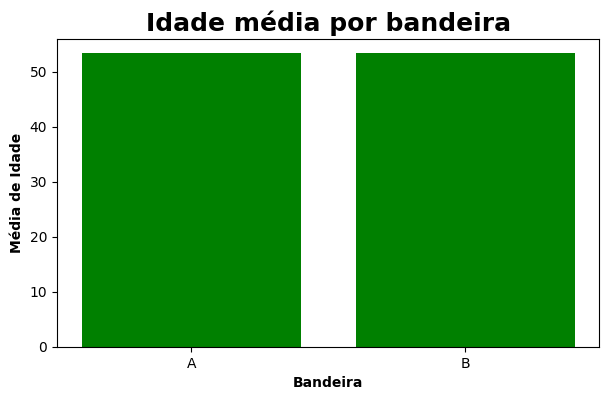

In [232]:
  #tamanho do gráfico
fig = plt.figure(figsize=(7,4))
  #titulo do gráfico
plt.title("Idade média por bandeira", loc= "center", fontsize=18, fontweight="bold", color="Black");
  #barplot = Grafico de barras
plt.bar(agg_idade_bandeira["bandeira"], agg_idade_bandeira["idade"], color= "green");
  #plotando e renomeando o nome do eixo x + tamanho da fonte, em negrito e a cor
plt.xlabel("Bandeira", fontsize=10, fontweight="bold", color="Black");
  #plotando e renomeando o nome do eixo y + tamanho da fonte, em negrito e a cor
plt.ylabel("Média de Idade", fontsize=10, fontweight="bold", color="Black");

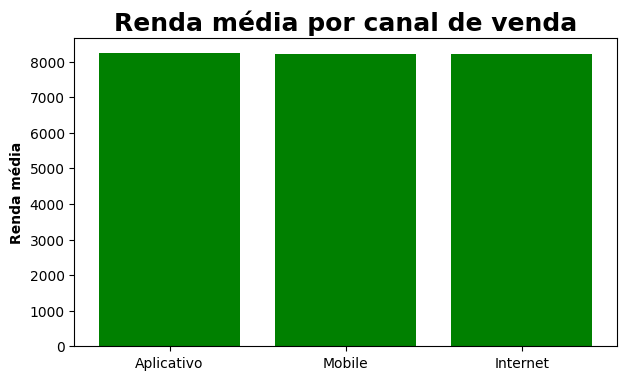

In [233]:
  #tamanho do grafico
fig = plt.figure(figsize=(7,4));

  #titulo do grafico
plt.title("Renda média por canal de venda", loc="center", fontsize=18, fontweight="bold", color="Black");
  #barplot = grafico de barras
plt.bar(media_de_renda_para_cada_tipo_de_venda["idcanalvenda"], media_de_renda_para_cada_tipo_de_venda["renda"], color="green");
  #plotando e renomeando o nome do eixo y + o tamanho da fonte, em negrito e a cor
plt.ylabel("Renda média", fontsize=10, fontweight="bold", color="Black");

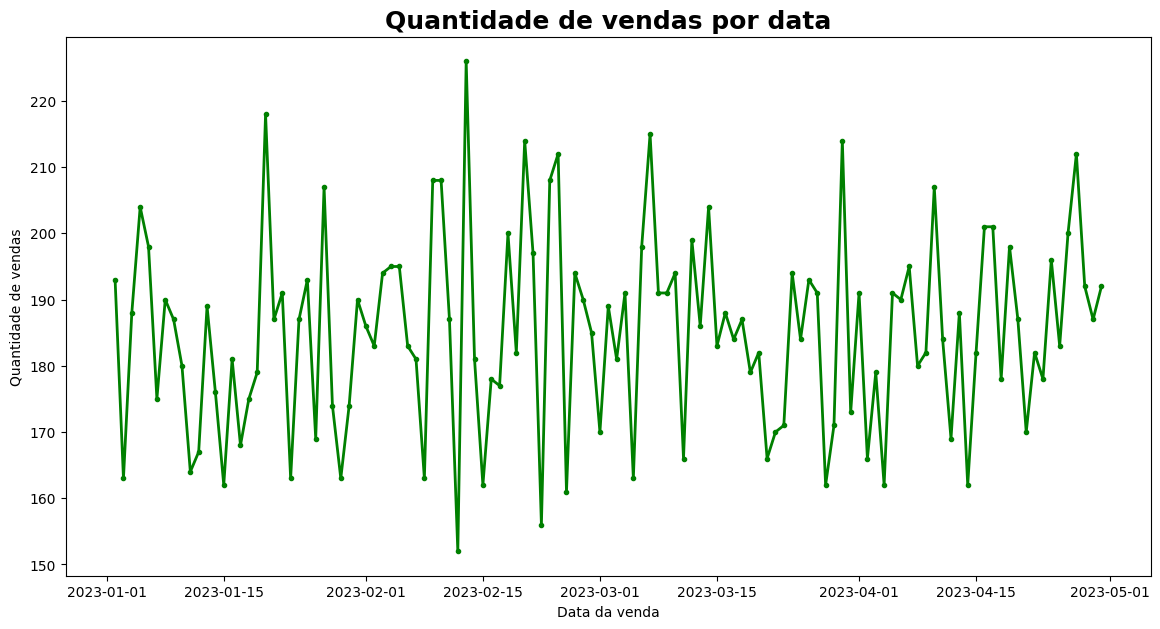

In [234]:
  #tamanho do grafico
fig = plt.figure(figsize=(14,7));
  #definindo o eixo x e y
x = venda_por_data["Data"];
y = venda_por_data["idcompra"];

  #plotando o grafico de linhas
plt.plot(x,y, color="green", linewidth = "2", marker=".");
  #titulo do grafico
plt.title("Quantidade de vendas por data", loc="center", fontsize=18, fontweight="bold", color="Black");
  #plotando e renomeando o nome do eixo x
plt.xlabel("Data da venda");
  #plotando e renomeando o nome do eixo y
plt.ylabel("Quantidade de vendas");

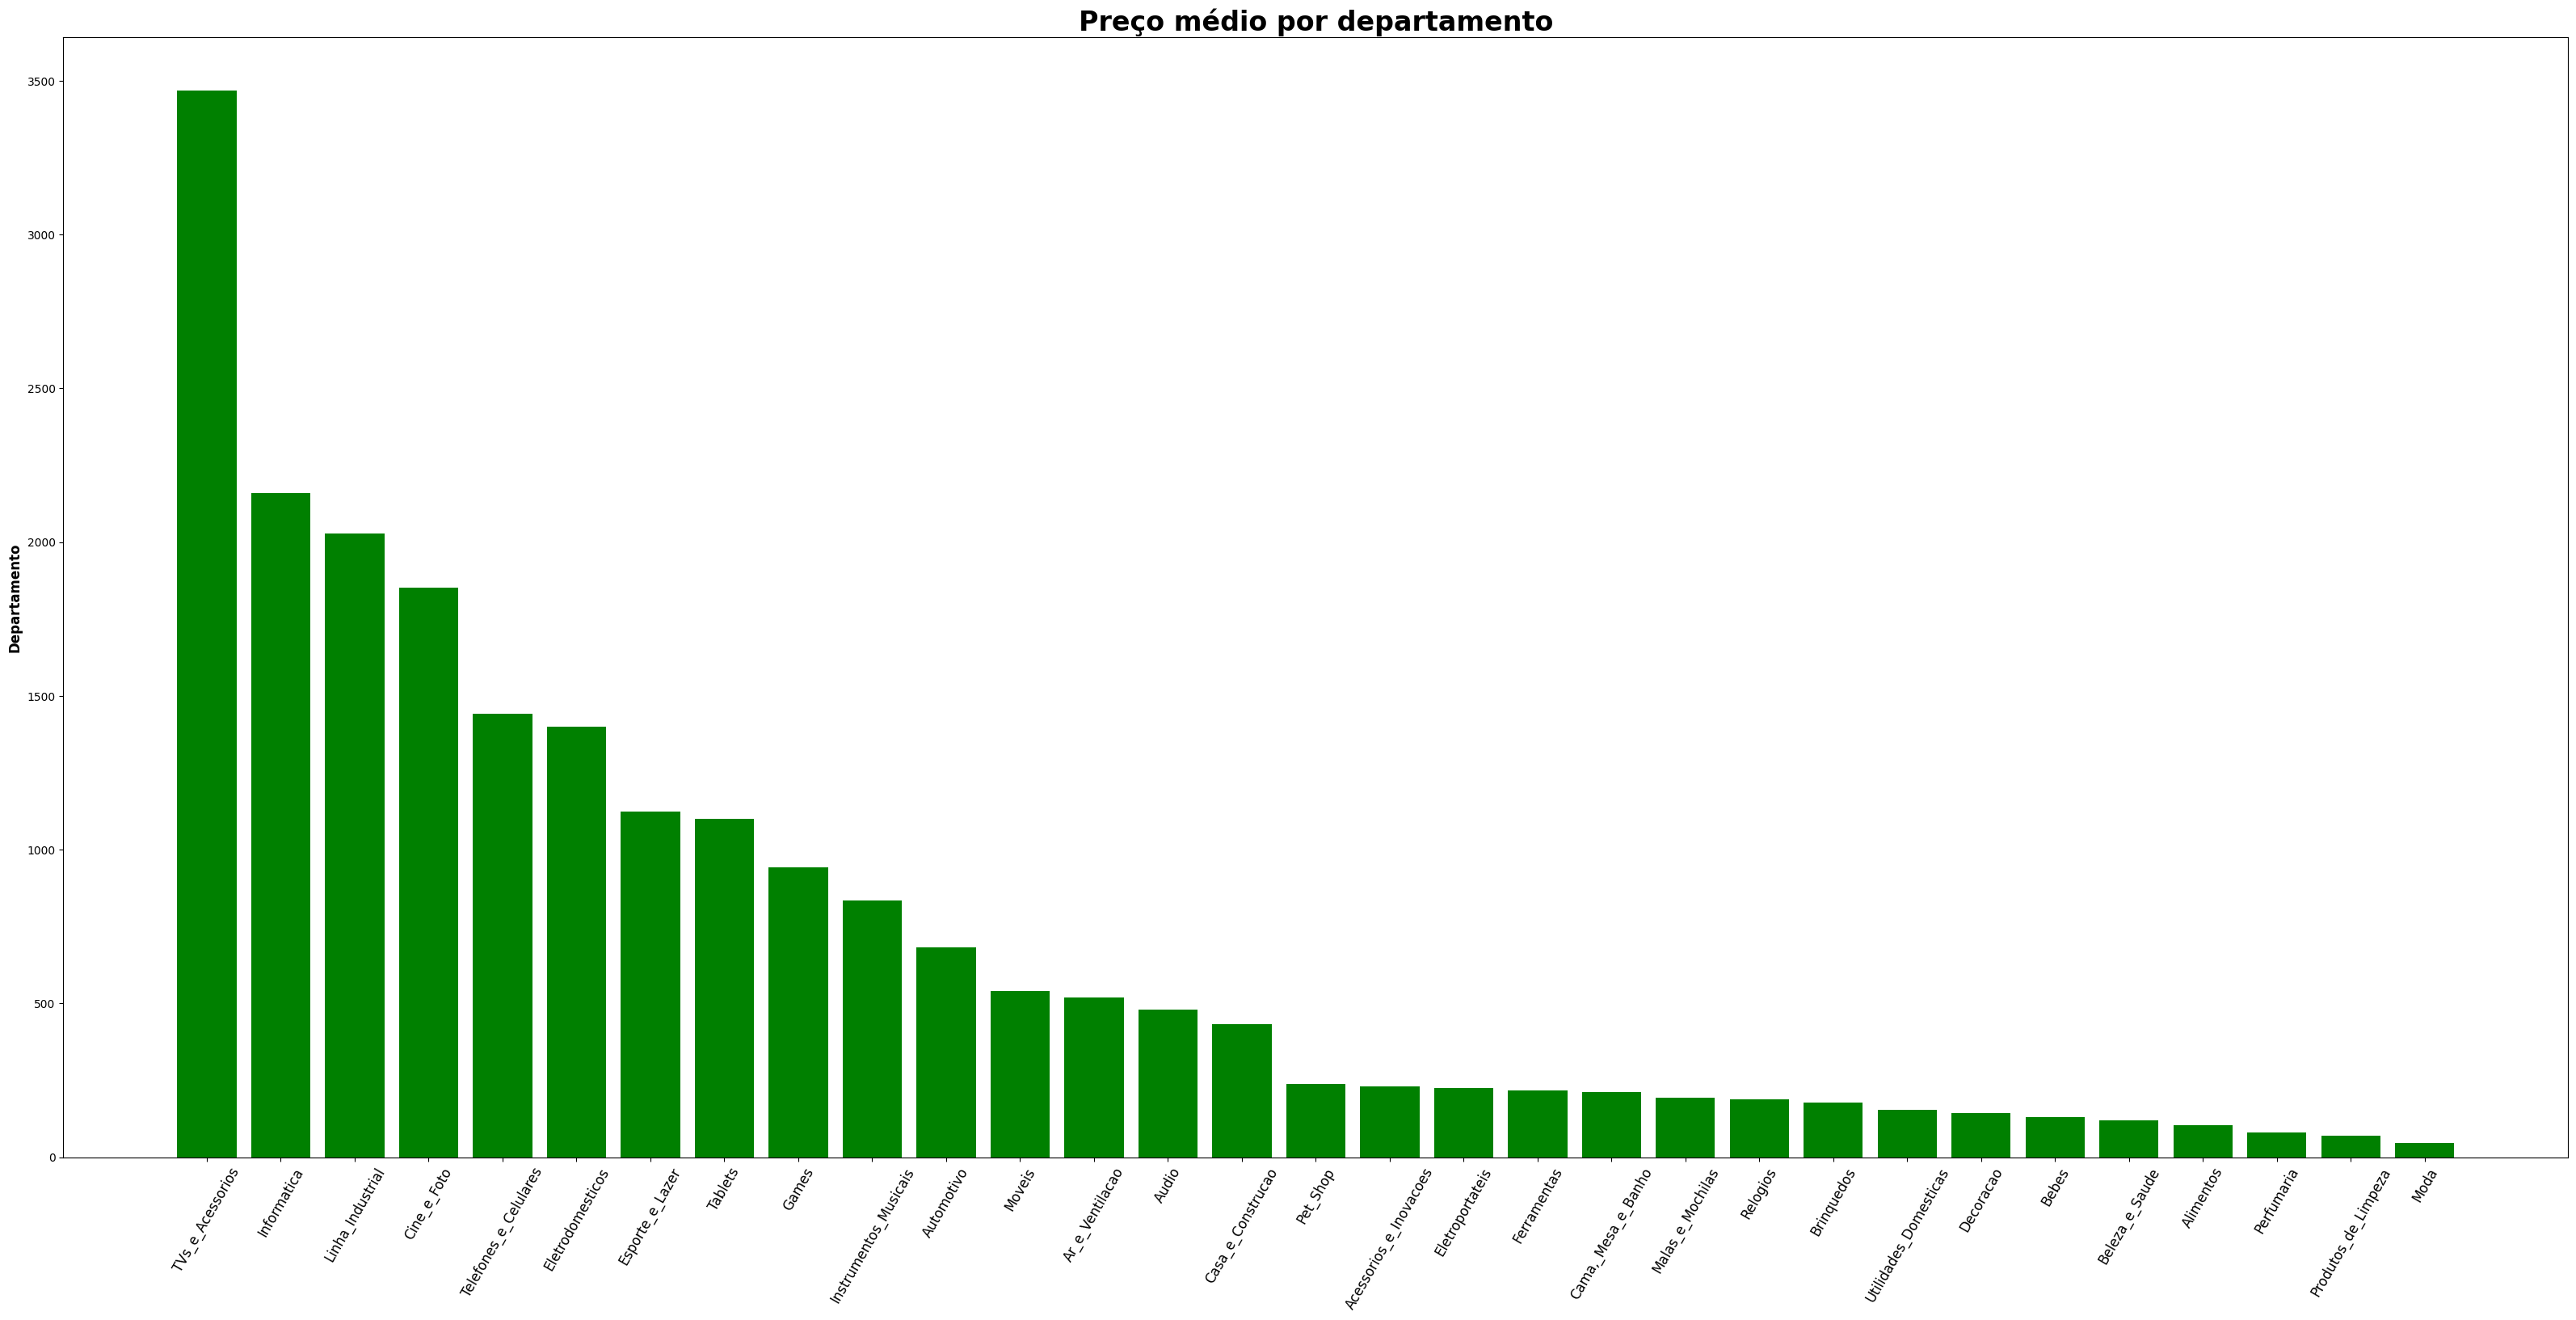

In [235]:
  #tamanho do grafico
fig = plt.figure(figsize=(40,18));

  #titulo do grafico
plt.title("Preço médio por departamento", loc="center", fontsize=24, fontweight="bold", color="Black");
  #barplot = grafico de barras
plt.bar(Media_preco_com_frete_por_nome_de_departamento["Nome_Departamento"], Media_preco_com_frete_por_nome_de_departamento["Preço_com_frete"], color="green");
  #plotando e renomeando o nome do eixo y + o tamanho da fonte, em negrito e a cor
plt.ylabel("Departamento", fontsize=12, fontweight="bold", color="Black");
  #plotando e renomeando o nome do eixo x + rotacionando o nome p/caber todos, o tamanho da fonte e a cor
plt.xticks(rotation=60, fontsize=12, color="Black");

#***CASE VAREJO - Transformando em visualizações (Plotly)***

In [ ]:
  #Instalando a biblioteca do plotly
%pip install plotly
%pip install cufflinks
%pip install chart_studio

In [237]:
  #importando a biblioteca
import chart_studio.plotly as py
import cufflinks as cf
import plotly.graph_objects as go
import plotly.express as px

In [238]:
  #bar = grafico de barras
px.bar(agg_idade_bandeira, x="bandeira", y="idade")

In [239]:
  #line = grafico de linhas
px.line(venda_por_data, x="Data", y="idcompra")

In [240]:
  #bar = grafico de barras
px.bar(Media_preco_com_frete_por_nome_de_departamento, x="Nome_Departamento", y="Preço_com_frete")